In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy.interpolate import make_interp_spline
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import silhouette_score

df=pd.read_csv(r'Irish_DataSet\standardData2.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Duration", 2: "Consumption"},inplace=True)

In [2]:
pip install tslearn

Note: you may need to restart the kernel to use updated packages.


In [129]:
unique_meter_ids = df['ID'].unique()
meter_ids = unique_meter_ids[:30]
X = []
for meter_id in meter_ids:
    meter_data = df[df['ID'] == meter_id]['Consumption'].values
    num_values_to_keep = int(len(meter_data) * 0.2)
    meter_data = meter_data[:num_values_to_keep] 
    X.append(meter_data)

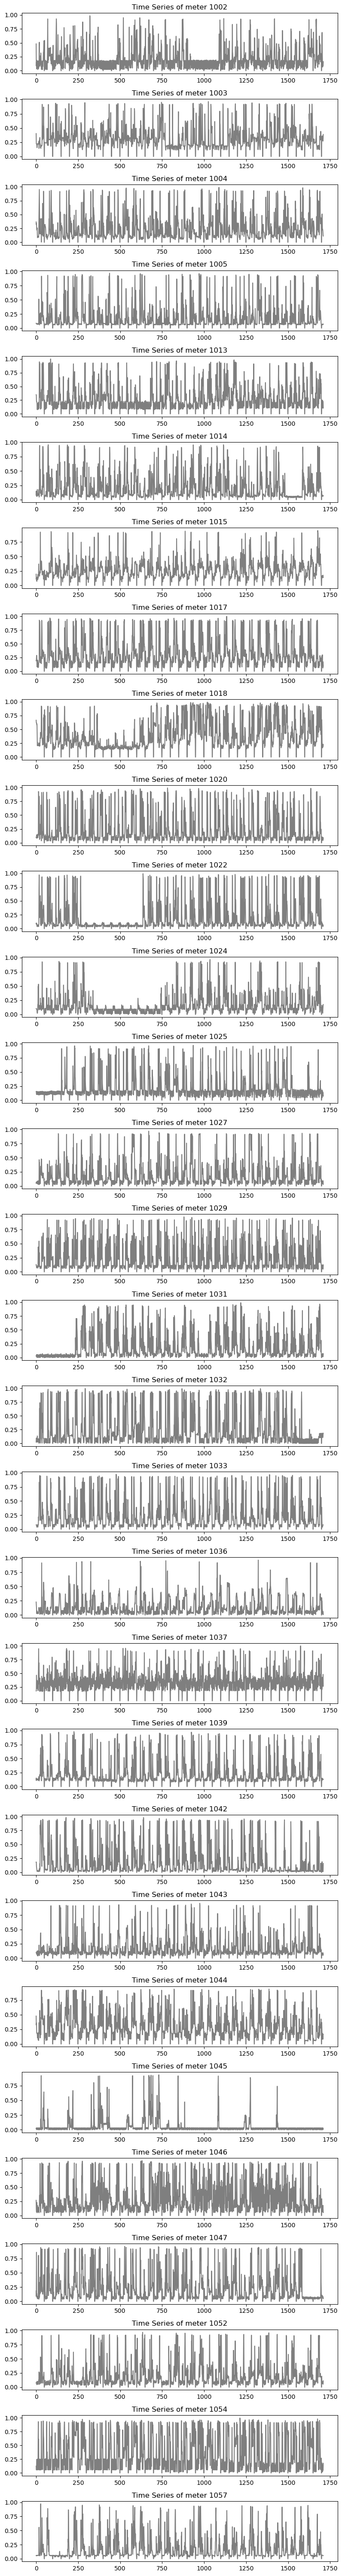

In [130]:
fig, axs = plt.subplots(len(X), 1, figsize=(8, 2 * len(X))) 

for yi in range(len(X)):
    axs[yi].plot(X[yi].ravel(), "k-", alpha=0.5)
    axs[yi].set_title(f"Time Series of meter {meter_ids[yi]}")
plt.tight_layout()
plt.show()

In [145]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=11, min_samples=1, metric='euclidean')

# Fit the DBSCAN model to your data
dbscan.fit(X)

# Get the cluster labels for each data point
cluster_labels = dbscan.labels_

# Print the clusters and their sizes
unique_labels = set(cluster_labels)
for label in unique_labels:
    cluster_size = np.sum(cluster_labels == label)
    if label == -1:
        print(f'Noise: {cluster_size} data points')
    else:
        print(f'Cluster {label}: {cluster_size} data points')
labels

Cluster 0: 21 data points
Cluster 1: 1 data points
Cluster 2: 1 data points
Cluster 3: 1 data points
Cluster 4: 1 data points
Cluster 5: 1 data points
Cluster 6: 1 data points
Cluster 7: 1 data points
Cluster 8: 1 data points
Cluster 9: 1 data points


array([0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 0, 0, 5, 6, 0, 0],
      dtype=int64)

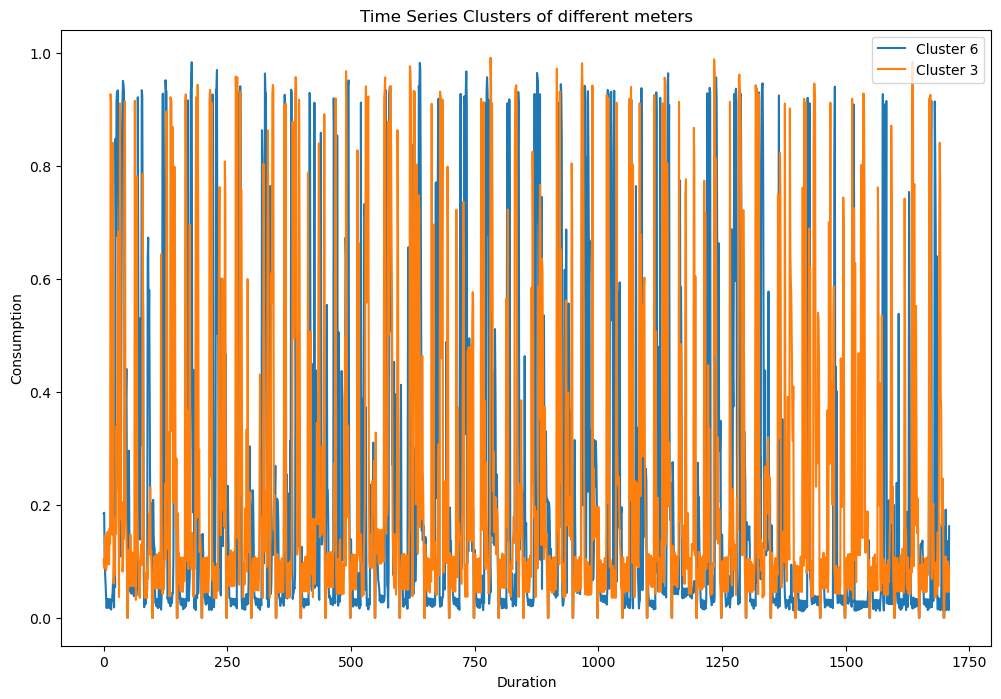

In [148]:
clusters_to_plot = [6,3]  # Adjust as needed
plt.figure(figsize=(12, 8))

# Create a scatter plot with different colors for each cluster
for label in clusters_to_plot:
    cluster_data = [X[i] for i in range(len(X)) if cluster_labels[i] == label]
    for series in cluster_data:
        plt.plot(series, label=f'Cluster {label}')

plt.title("Time Series Clusters of different meters")
plt.xlabel("Duration")  # Replace with your actual label
plt.ylabel("Consumption")  # Replace with your actual label
plt.legend()
plt.show()

In [146]:
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.04926896237222831


In [147]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_index}")

Davies-Bouldin Index: 0.7277162644304773


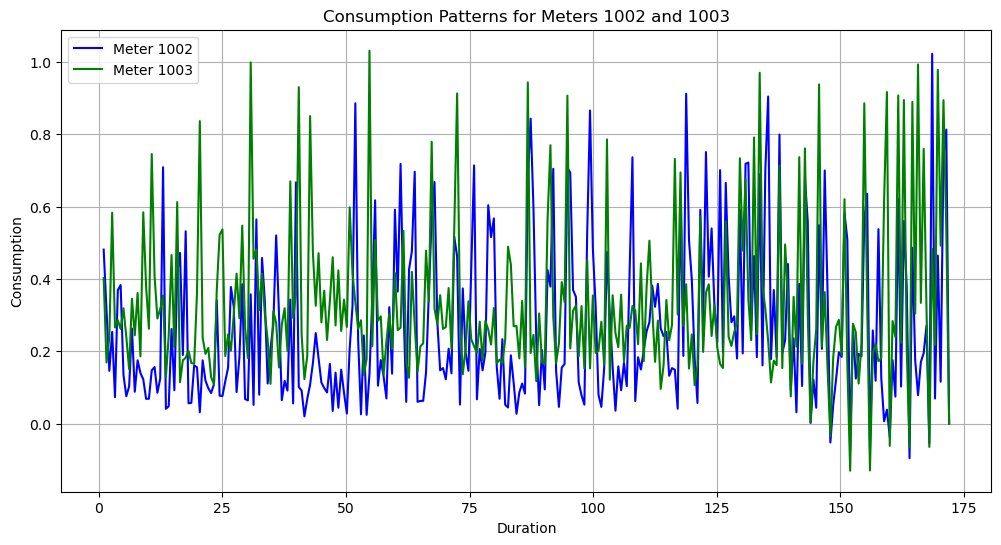

In [83]:
meter_1002_data = df[df['ID'] == 1002]
meter_1003_data = df[df['ID'] == 1003]

# Sort the data by 'Duration' for a smoother curve
meter_1002_data = meter_1002_data.sort_values(by='Duration')
meter_1003_data = meter_1003_data.sort_values(by='Duration')

# Interpolate the data for smoother curves
x1 = meter_1002_data['Duration']
y1 = meter_1002_data['Consumption']
x2 = meter_1003_data['Duration']
y2 = meter_1003_data['Consumption']

x_smooth1 = np.linspace(x1.min(), x1.max(), 300)  # Increase the number of points for smoother curve
y_smooth1 = make_interp_spline(x1, y1)(x_smooth1)
x_smooth2 = np.linspace(x2.min(), x2.max(), 300)  # Increase the number of points for smoother curve
y_smooth2 = make_interp_spline(x2, y2)(x_smooth2)

# Plot the consumption patterns of both meters in a single graph
plt.figure(figsize=(12, 6))
plt.plot(x_smooth1, y_smooth1, label='Meter 1002', linestyle='-', color='b')
plt.plot(x_smooth2, y_smooth2, label='Meter 1003', linestyle='-', color='g')
plt.title('Consumption Patterns for Meters 1002 and 1003')
plt.xlabel('Duration')
plt.ylabel('Consumption')
plt.grid(True)
plt.legend()
plt.show()

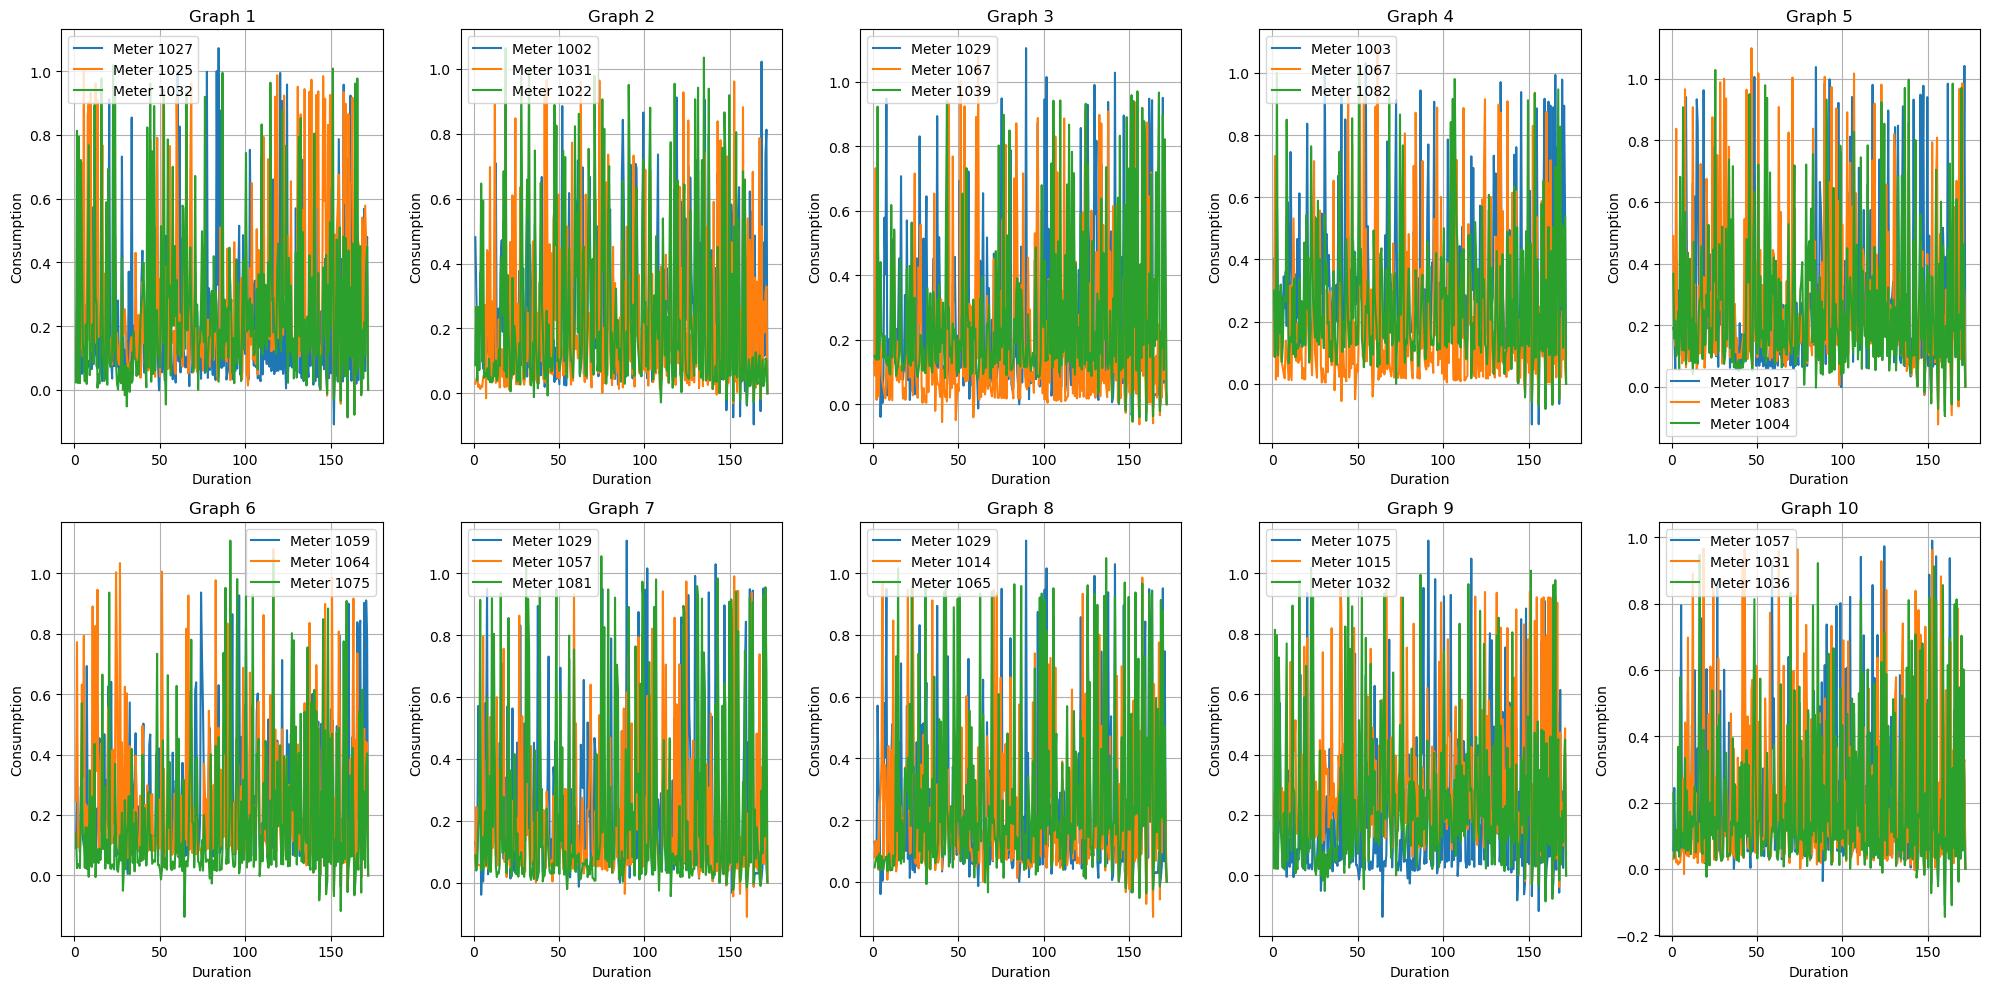

In [84]:
import random

meter_ids = df['ID'].unique()

# Create 10 random combinations of 3 meter IDs
random_meter_combinations = [random.sample(list(meter_ids), 3) for _ in range(10)]

# Create a 2x5 grid of subplots for the 10 graphs
fig, axs = plt.subplots(2, 5, figsize=(20, 10))

# Iterate through the random meter combinations and plot them
for i, meter_combination in enumerate(random_meter_combinations):
    row = i // 5
    col = i % 5
    ax = axs[row, col]
    
    # Plot each meter's consumption pattern in the subplot
    for meter_id in meter_combination:
        meter_data = df[df['ID'] == meter_id]
        meter_data = meter_data.sort_values(by='Duration')
        x = meter_data['Duration']
        y = meter_data['Consumption']
        x_smooth = np.linspace(x.min(), x.max(), 300)
        y_smooth = make_interp_spline(x, y)(x_smooth)
        ax.plot(x_smooth, y_smooth, linestyle='-', label=f'Meter {meter_id}')
    
    ax.set_title(f'Graph {i + 1}')
    ax.set_xlabel('Duration')
    ax.set_ylabel('Consumption')
    ax.grid(True)
    ax.legend()

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()